### Concept of Bagging

- CART is a model which most of the time, suffers due to overfitting and hence results in high variance.
- In order to reduce the variance without making any compromise on bias, we can use ensemble methods.
- One of the techniques to do that is bagging(Bootstrap Aggregation)
- In bagging, we create several resamples from our original training sample, build models using each resample, then pass our test data into each model.
- The results from the models are aggregated. The aggregated output has less variance compared to the model fitted usuing our train sample.

+ We first fit a model with our training sample, find out the accuracy of that model on our test data. Then using our aggregated bootsrap sample model, we find the accuracy of the model

+ Let us see if our theory is valid and if it is, how much of a difference it makes

### For this project, we will use Titanic dataset from Kaggle. Using variables like gender, age, class of ticket and few other variables with a classification tree model, we predict if they survived or not

### Importing packages

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import confusion_matrix

from scipy.stats import mode

### Reading data

In [70]:
titanic = pd.read_csv("D:\\Praxis\\ML\\data\\titanic\\titanic.csv")

In [71]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Data dictionary


- Variable -	Definition	Key
- survival -	Survival	0 = No, 1 = Yes
- pclass -	  Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- sex -	        Sex	
- Age -	      Age in years	
- sibsp -	  # of siblings / spouses aboard the Titanic	
- parch -	  # of parents / children aboard the Titanic	
- ticket -	  Ticket number	
- fare -	  Passenger fare	
- cabin -	  Cabin number	
- embarked -  Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [72]:
X = titanic[['PassengerId','Pclass','Age', 'SibSp', 'Parch', 'Fare','Sex','Ticket','Cabin']]
y = titanic['Survived']

### Splitting data into train and test

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, stratify = y, random_state = 50)

### Looking at the data

In [74]:
X_train.shape

(623, 9)

In [75]:
X_train.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex',
       'Ticket', 'Cabin'],
      dtype='object')

In [76]:
X_train.sample(2)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex,Ticket,Cabin
183,184,2,1.0,2,1,39.00,male,230136,F4
334,335,1,NaN,1,0,133.65,female,PC 17611,NaN


In [77]:
X_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,623.000000,623.000000,495.000000,623.000000,623.000000,623.000000
mean,448.823435,2.332263,29.641414,0.521669,0.372392,31.573902
std,258.299343,0.837449,14.856832,1.075492,0.723520,48.483040
min,2.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,225.500000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,449.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,39.000000,1.000000,0.000000,30.500000
max,891.000000,3.000000,80.000000,8.000000,5.000000,512.329200


### Univariate Analysis

### Survived

In [78]:
y_train

242    0
365    0
652    0
86     0
262    0
      ..
783    0
742    1
850    0
423    0
847    0
Name: Survived, Length: 623, dtype: int64

### Passenger class

In [79]:
X_train['Pclass'].value_counts()

#145 passengers belong to 1st class
#136 passengers belong to 2nd class
#342 passengers belong to 3rd class

3    356
1    149
2    118
Name: Pclass, dtype: int64

### Passenger age

In [80]:
sum(X_train['Age'].isnull())

# 117 null values in age. Lets look at the distribution of age to decide what to use to impute missing values

128

In [82]:
X_train_without_null_age_values = X_train[X_train['Age'].notnull()]

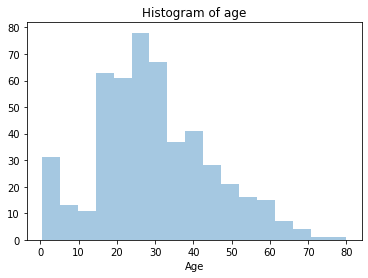

In [83]:
sns.distplot((X_train_without_null_age_values['Age']), kde=False)
plt.title('Histogram of age')
plt.show();

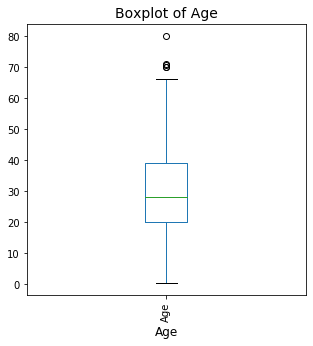

In [84]:
#The rotation argument
#Side by Side boxplot
X_train_without_null_age_values.boxplot(column="Age",
             grid=False,         
             figsize = (5,5),
             rot=90)            #The angle by which you want to rotate the labels

plt.xlabel("Age", fontsize=12)
plt.title("Boxplot of Age", fontsize=14)

plt.show()


In [85]:
X_train_without_null_age_values.Age.describe()

count    495.000000
mean      29.641414
std       14.856832
min        0.420000
25%       20.000000
50%       28.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

#### After looking at the histogram and boxplot, mean and median are very close to each other. Distribution is not very skewed with a few outliers. So mean is used to impute missing values

In [86]:
X_train.loc[X_train.Age.isnull(), 'Age'] = np.mean(X_train_without_null_age_values.Age)

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [87]:
X_train.Age.describe()

count    623.000000
mean      29.641414
std       13.240198
min        0.420000
25%       22.000000
50%       29.641414
75%       35.000000
max       80.000000
Name: Age, dtype: float64

### Number of siblings/ spouse brought on board

In [88]:
X_train.SibSp.value_counts()

# Most of the passengers have no siblings or spouse on the ship. Some have 1. Very few have more than that. 

0    424
1    144
2     25
4     13
3      9
8      4
5      4
Name: SibSp, dtype: int64

### Number of parents/ children brought on board

In [89]:
X_train.Parch.value_counts()

# Most of the passengers haven't brought their parent or children on board. Some of them have brought 1/2

0    468
1     87
2     62
3      4
5      1
4      1
Name: Parch, dtype: int64

### Fare

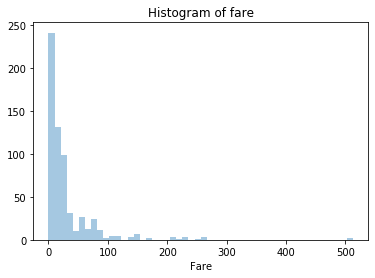

In [90]:
sns.distplot((X_train['Fare']), kde=False)
plt.title('Histogram of fare')
plt.show();

### most of the people seem to have paid no fare, meaning they got their ticket for free

### Sex

In [91]:
X_train.Sex.value_counts()

# 65% of the passengers were male and 35% were female

male      406
female    217
Name: Sex, dtype: int64

In [92]:
X_train.loc[X_train.Sex == 'male', 'Sex_int'] = 1
X_train.loc[X_train.Sex == 'female', 'Sex_int'] = 0

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


In [93]:
X_train.Sex_int.value_counts()

1.0    406
0.0    217
Name: Sex_int, dtype: int64

### Pre processing done on test data

In [94]:
X_test_without_null_age_values = X_test[X_test['Age'].notnull()]
X_test.loc[X_test.Age.isnull(), 'Age'] = np.mean(X_test_without_null_age_values.Age)

X_test.loc[X_test.Sex == 'male', 'Sex_int'] = 1
X_test.loc[X_test.Sex == 'female', 'Sex_int'] = 0

### Creating X and y

In [95]:
X_train = X_train[['Pclass','Age', 'SibSp', 'Parch', 'Fare','Sex_int']]
#y_train = titanic['Survived']

X_test = X_test[['Pclass','Age', 'SibSp', 'Parch', 'Fare','Sex_int']]
#y_test = titanic_test['Survived']

### Fitting decision tree model

In [96]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth = 6, min_samples_leaf = 5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [97]:
y_pred = clf_gini.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

### Visualising our tree

In [98]:
import sklearn.tree as tree
import pydotplus
from sklearn.externals.six import StringIO 
from IPython.display import Image

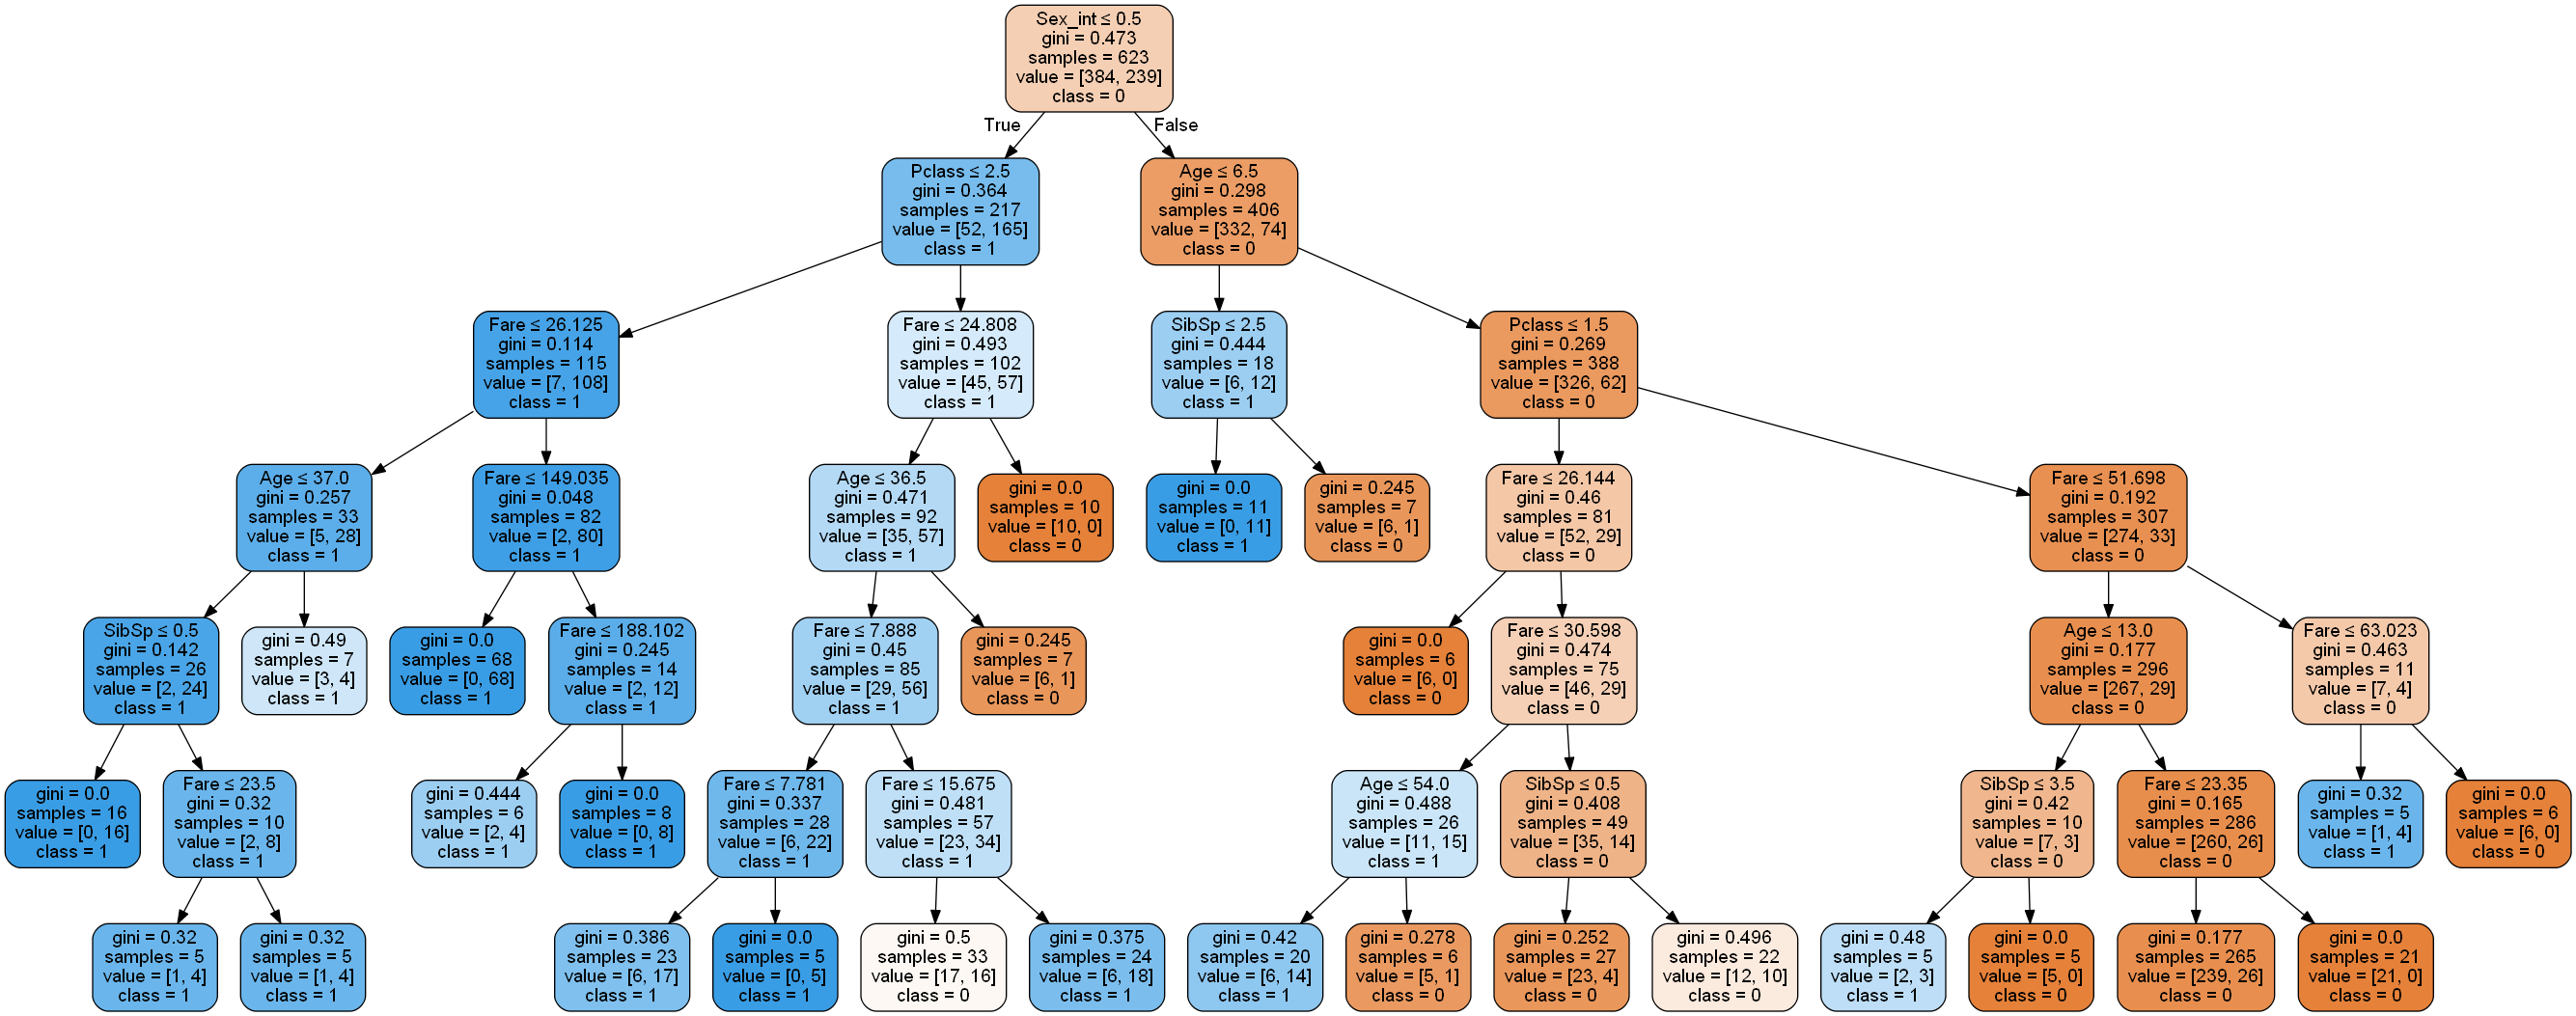

In [99]:
dot_data = StringIO()
tree.export_graphviz(clf_gini, 
 out_file=dot_data, 
 class_names=['0','1'],# the target names.
 feature_names=['Pclass','Age', 'SibSp', 'Parch', 'Fare','Sex_int'], # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True)
 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [100]:
c = confusion_matrix(y_test,y_pred)

In [101]:
c

array([[150,  15],
       [ 31,  72]], dtype=int64)

In [102]:
overall_accuracy = 1
correct_preds = 0
for i in range(0,2):
    for j in range(0,2):
        if (i == j):
            correct_preds = correct_preds + c[i][j]
overall_accuracy = correct_preds / np.sum(c)
print("Overall accuracy is {}".format(overall_accuracy))

Overall accuracy is 0.8283582089552238


In [105]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score,roc_auc_score

In [106]:
def binary_classification_performance(y_test, y_pred):
    tp, fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()
    accuracy = round(accuracy_score(y_pred = y_pred, y_true = y_test),2)
    precision = round(precision_score(y_pred = y_pred, y_true = y_test),2)
    recall = round(recall_score(y_pred = y_pred, y_true = y_test),2)
    f1_score = round(2*precision*recall/(precision + recall),2)
    specificity = round(tn/(tn+fp),2)
    npv = round(tn/(tn+fn),2)
    auc_roc = round(roc_auc_score(y_score = y_pred, y_true = y_test),2)


    result = pd.DataFrame({'Accuracy' : [accuracy],
                         'Precision (or PPV)' : [precision],
                         'Recall (senitivity or TPR)' : [recall],
                         'f1 score' : [f1_score],
                         'AUC_ROC' : [auc_roc],
                         'Specificty (or TNR)': [specificity],
                         'NPV' : [npv],
                         'True Positive' : [tp],
                         'True Negative' : [tn],
                         'False Positive':[fp],
                         'False Negative':[fn]})
    return result

In [107]:
binary_classification_performance(y_test, y_pred)

,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.83,0.83,0.7,0.76,0.8,0.83,0.7,150,72,15,31


### Let's see if we can improve that using the prinicple of bagging - bootstrap aggregation.

In [120]:
### Combining X_train and y_train, so that they can be split into several bootstrap samples

X = X_train
y = y_train
X['Survived'] = y
train = X

In [121]:
train.shape[0]

623

In [122]:
k = 2000

In [123]:
bootstrap_samples = []
bootstrap_sample_X = []
bootstrap_sample_y = []
for i in range(0,k):
    bootstrap_samples.append(train.sample(train.shape[0], replace = True))
    bootstrap_sample_X.append(bootstrap_samples[i][['Pclass','Age', 'SibSp', 'Parch', 'Fare','Sex_int']])
    bootstrap_sample_y.append(bootstrap_samples[i][['Survived']])

### Fitting decision tree model with bootstrap samples

In [124]:
y_pred = []
clf_gini = []
for i in range(0,k):
    clf_gini.append(DecisionTreeClassifier(criterion = "gini", random_state = 100))
    clf_gini[i].fit(bootstrap_sample_X[i], bootstrap_sample_y[i])
    y_pred.append(clf_gini[i].predict(X_test))    

### Finding the aggregate measure, in this case, mode

In [125]:
modes_list = []
for i in range(0, len(y_pred[0])):
    ith_obs_list = []
    for j in range(0,len(y_pred)):
        ith_obs_list.append(y_pred[j][i])
    #print(ith_obs_list)
    modes_list.append(mode(ith_obs_list)[0][0])

In [126]:
len(y_test)

268

In [127]:
len(modes_list)

268

In [128]:
bootstrap_c = confusion_matrix(y_test,modes_list)

In [129]:
bootstrap_c

array([[153,  12],
       [ 29,  74]], dtype=int64)

In [130]:
binary_classification_performance(y_test, modes_list)

,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.85,0.86,0.72,0.78,0.82,0.86,0.72,153,74,12,29


In [131]:
overall_accuracy = 1
correct_preds = 0
for i in range(0,2):
    for j in range(0,2):
        if (i == j):
            correct_preds = correct_preds + bootstrap_c[i][j]
overall_accuracy = correct_preds / np.sum(bootstrap_c)
print("Overall accuracy is {}".format(overall_accuracy))

Overall accuracy is 0.8470149253731343


In [132]:
bootstrap_sample_X[0].iloc[:,[0,1,2,3,4,5]]

,Pclass,Age,SibSp,Parch,Fare,Sex_int
312,2,26.000000,1,1,26.0000,0.0
57,3,28.500000,0,0,7.2292,1.0
827,2,1.000000,0,2,37.0042,1.0
407,2,3.000000,1,1,18.7500,1.0
500,3,17.000000,0,0,8.6625,1.0
...,...,...,...,...,...,...
107,3,29.641414,0,0,7.7750,1.0
627,1,21.000000,0,0,77.9583,0.0
371,3,18.000000,1,0,6.4958,1.0
349,3,42.000000,0,0,8.6625,1.0


### Random Forest

In [133]:
y_pred_RF = []
clf_gini_RF = []
features_list = []
sequence = [i for i in range(bootstrap_sample_X[0].shape[1])]
from random import sample
#int(np.ceil(np.sqrt(bootstrap_sample_X[0].shape[1])))
for i in range(0,k):
    
    clf_gini_RF.append(DecisionTreeClassifier(criterion = "gini", random_state = 100))
    feature_subset = sample(sequence, 3)
    clf_gini_RF[i].fit(bootstrap_sample_X[i].iloc[:,feature_subset], bootstrap_sample_y[i])
    y_pred_RF.append(clf_gini_RF[i].predict(X_test.iloc[:,feature_subset]))    

In [134]:
feature_subset = sample(sequence, int(np.ceil(np.sqrt(bootstrap_sample_X[0].shape[1]))))
feature_subset

[1, 4, 2]

### Finding the aggregate measure, in this case, mode

In [135]:
modes_list_RF = []
for i in range(0, len(y_pred_RF[0])):
    ith_obs_list_RF = []
    for j in range(0,len(y_pred_RF)):
        ith_obs_list_RF.append(y_pred_RF[j][i])
    #print(ith_obs_list)
    modes_list_RF.append(mode(ith_obs_list_RF)[0][0])

In [136]:
bootstrap_c_RF = confusion_matrix(y_test,modes_list_RF)

In [137]:
bootstrap_c_RF

array([[150,  15],
       [ 37,  66]], dtype=int64)

In [138]:
binary_classification_performance(y_test, modes_list_RF)

,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.81,0.81,0.64,0.72,0.77,0.81,0.64,150,66,15,37


In [139]:
overall_accuracy_RF = 1
correct_preds_RF = 0
for i in range(0,2):
    for j in range(0,2):
        if (i == j):
            correct_preds_RF = correct_preds_RF + bootstrap_c_RF[i][j]
overall_accuracy_RF = correct_preds_RF / np.sum(bootstrap_c_RF)
print("Overall accuracy is {}".format(overall_accuracy_RF))

Overall accuracy is 0.8059701492537313


### Finding the least accurate and most accurate trees and their features

In [140]:
from sklearn.metrics import accuracy_score

In [141]:
y_pred_RF_check = []
clf_gini_RF_check = []
accuracy_list = []
sequence = [i for i in range(bootstrap_sample_X[0].shape[1])]
features_lists = []
from random import sample
#int(np.ceil(np.sqrt(bootstrap_sample_X[0].shape[1])))
for i in range(0,k):
    
    clf_gini_RF_check.append(DecisionTreeClassifier(criterion = "gini", random_state = 100))
    feature_subset = sample(sequence, 3)
    clf_gini_RF_check[i].fit(bootstrap_sample_X[i].iloc[:,feature_subset], bootstrap_sample_y[i])
    y_pred_RF_check.append(clf_gini_RF_check[i].predict(X_test.iloc[:,feature_subset]))     
    accuracy_list.append(accuracy_score(y_test, y_pred_RF_check[i]))
    features_list = []
    for j in feature_subset:
        features_list.append(bootstrap_sample_X[i].columns[j])
    features_lists.append(features_list)
min(accuracy_list)

0.5223880597014925

In [142]:
max(accuracy_list)

0.8283582089552238

In [143]:
indexes = [index for index in range(len(accuracy_list)) if accuracy_list[index] == min(accuracy_list)]
indexes

[239, 1347, 1400]

In [148]:
features_lists[1400]

['Age', 'SibSp', 'Parch']

In [58]:
features_lists[1487]

['SibSp', 'Fare', 'Age']

In [145]:
indexes = [index for index in range(len(accuracy_list)) if accuracy_list[index] == max(accuracy_list)]
indexes

[405, 862]

In [146]:
features_lists[indexes[0]]

['Pclass', 'Sex_int', 'Age']

In [149]:
indexes = [index for index in range(len(accuracy_list)) if accuracy_list[index] < 0.60]
len(indexes)

90

tree_id = 1487
features_list = []
for i in feature_subset:
    features_list.append(bootstrap_sample_X[tree_id].columns[i])
print(features_list)    
    
dot_data = StringIO()
tree.export_graphviz(clf_gini_RF[tree_id], 
 out_file=dot_data, 
 class_names=['0','1'],# the target names.
 feature_names=features_list, # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True)
 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())